In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from wordcloud import WordCloud

In [131]:
#EDA ON DATASET
apps=pd.read_csv(r'C:\Users\c w\Desktop\Python\googleplaystore.csv')
apps['Installs']=apps['Installs'].str.strip('+')
apps['Installs']=apps['Installs'].replace(to_replace=',+',value='',regex=True)
apps['Installs']=apps['Installs'].replace('Free',0)
apps['Installs']=apps['Installs'].astype(int)
apps.sort_values(by=['Rating'],inplace=True)
apps['Price']=apps['Price'].str.strip('$')
apps['Price']=apps['Price'][apps['Price']!='Everyone']
apps['Price']=apps['Price'].astype('float')
apps['Reviews']=apps['Reviews'].str.strip('M')
apps['Reviews']=apps['Reviews'].astype('float')
apps['Size']=apps['Size'].str.strip('M')
apps['Size']=apps['Size'].str.strip('k')
apps['Size']=apps['Size'].str.strip('+')
apps['Size']=apps['Size'].replace(to_replace=',',value='',regex=True)
apps['Size']=apps['Size'][apps['Size']!='Varies with device']
apps['Size']=apps['Size'].astype('float')
apps.drop_duplicates(keep='first',inplace=True)
apps.dropna(inplace=True)
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8820,DS Creator 2.0,TOOLS,1.0,2.0,4.4,500,Free,0.0,Everyone,Tools,"March 23, 2018",2.0.180226.1,4.0 and up
7144,CB Mobile Biz,FINANCE,1.0,3.0,8.4,500,Free,0.0,Everyone,Finance,"February 22, 2016",4.4.1255,4.0 and up
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0,2.0,33.0,100,Free,0.0,Everyone,Medical,"July 2, 2018",2.0.1,4.1 and up
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3.0,41.0,500,Free,0.0,Everyone,Tools,"December 12, 2017",1.0,4.2 and up
5151,Clarksburg AH,MEDICAL,1.0,1.0,28.0,50,Free,0.0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up


Text(0.5, 1.0, 'Free-Paid')

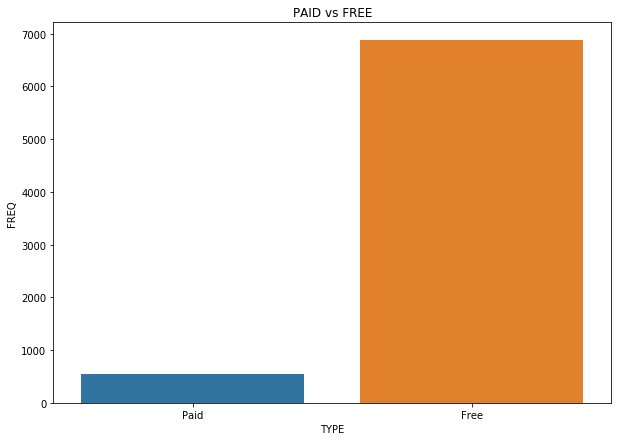

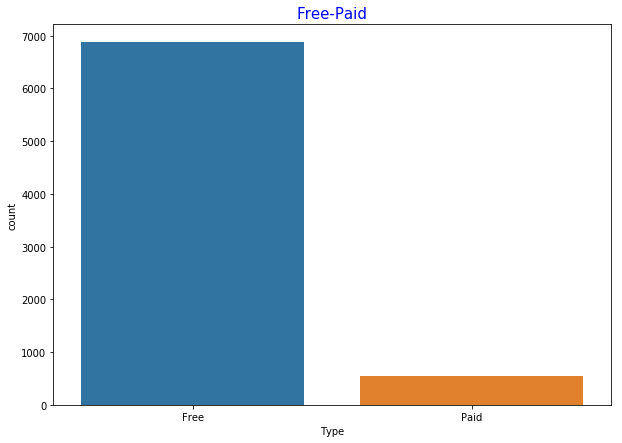

In [75]:
#BARPLOT
plt.figure(figsize=(10,7))
group=apps[['Type','Price']].groupby(['Type'],as_index=False).count().sort_values(by=['Price'])
fig=sns.barplot(x='Type',y='Price',data=group)
fig.set(xlabel='TYPE',ylabel='FREQ',title='PAID vs FREE')

#OR

#COUNTPLOT
plt.figure(figsize=(10,7))
sns.countplot(apps.Type)
plt.title("Free-Paid",color = 'blue',fontsize=15)

[Text(0, 0.5, 'CATEGORY'),
 Text(0.5, 0, 'RATING'),
 Text(0.5, 1.0, 'CATEGORY VS RATING')]

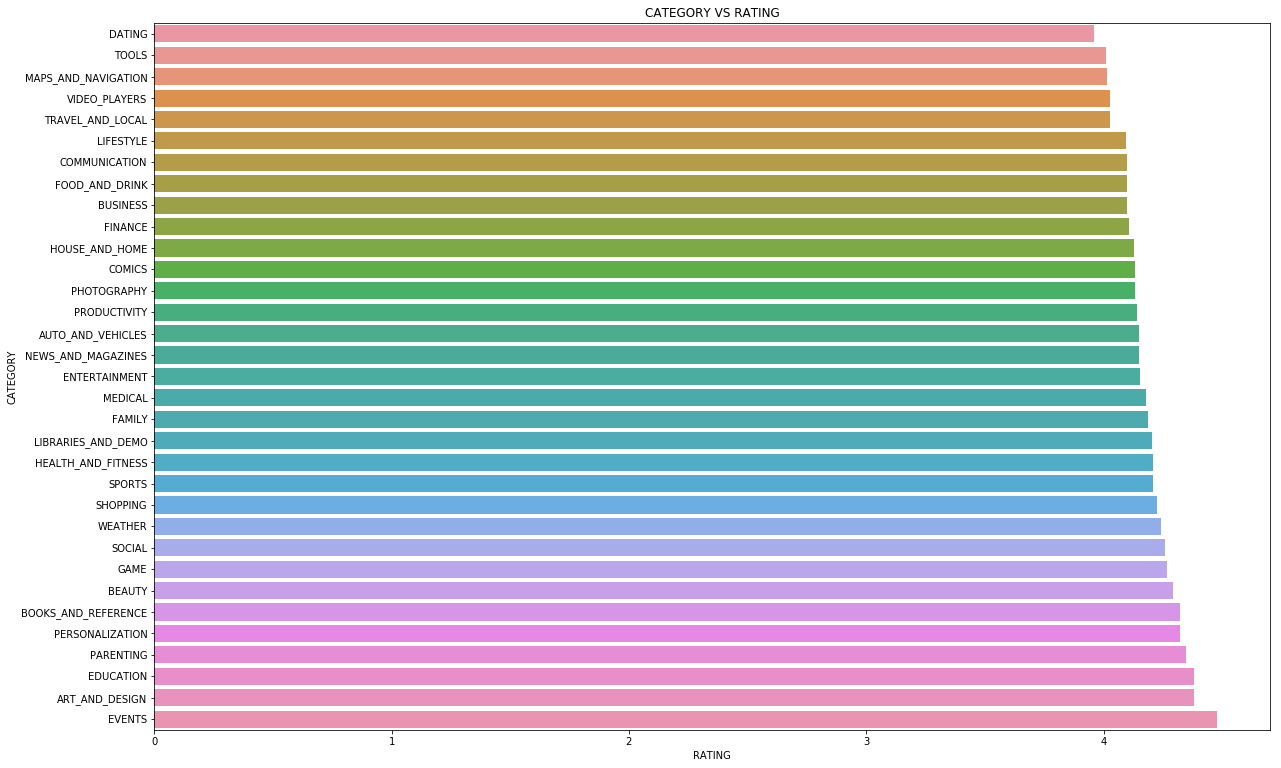

In [142]:
#Which category of app has better mean ratings among all
#BARPLOT
group=apps[['Category','Rating']].groupby(['Category'],as_index=False).mean().sort_values(by=['Rating'])
plt.figure(figsize=(20,13))
fig=sns.barplot(x='Rating',y='Category',data=group)
fig.set(xlabel='RATING',ylabel='CATEGORY',title='CATEGORY VS RATING')

[Text(0, 0.5, 'CATEGORY'),
 Text(0.5, 0, 'REVIEWS'),
 Text(0.5, 1.0, 'CATEGORY VS REVIEWS')]

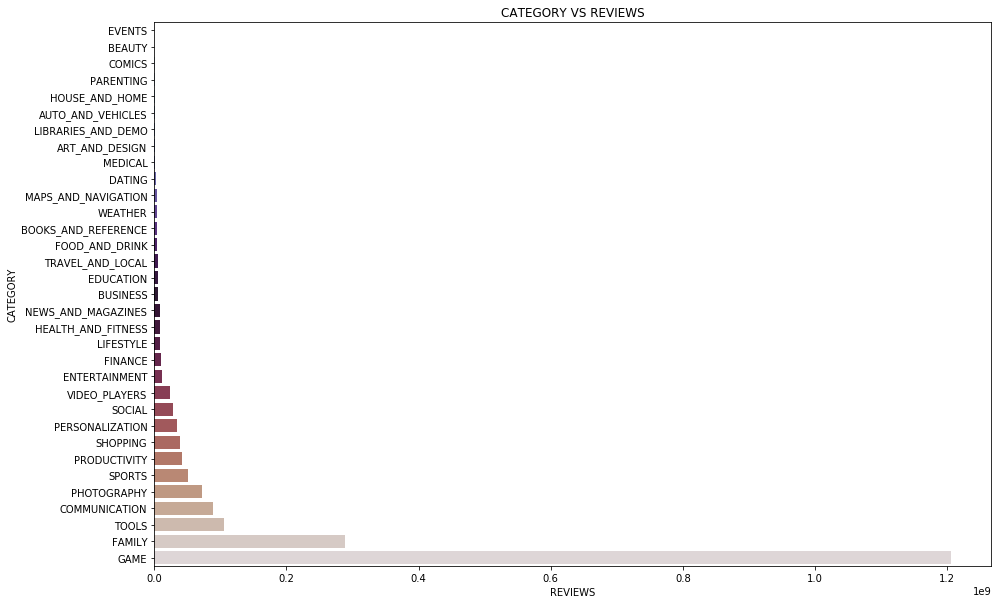

In [135]:
#Which category of app has highest number of reviews among all
#BARPLOT
group=apps[['Category','Reviews']].groupby(['Category'],as_index=False).sum().sort_values(by=['Reviews'])
plt.figure(figsize=(15,10))
fig=sns.barplot(x='Reviews',y='Category',data=group,palette='twilight')
fig.set(xlabel='REVIEWS',ylabel='CATEGORY',title='CATEGORY VS REVIEWS')

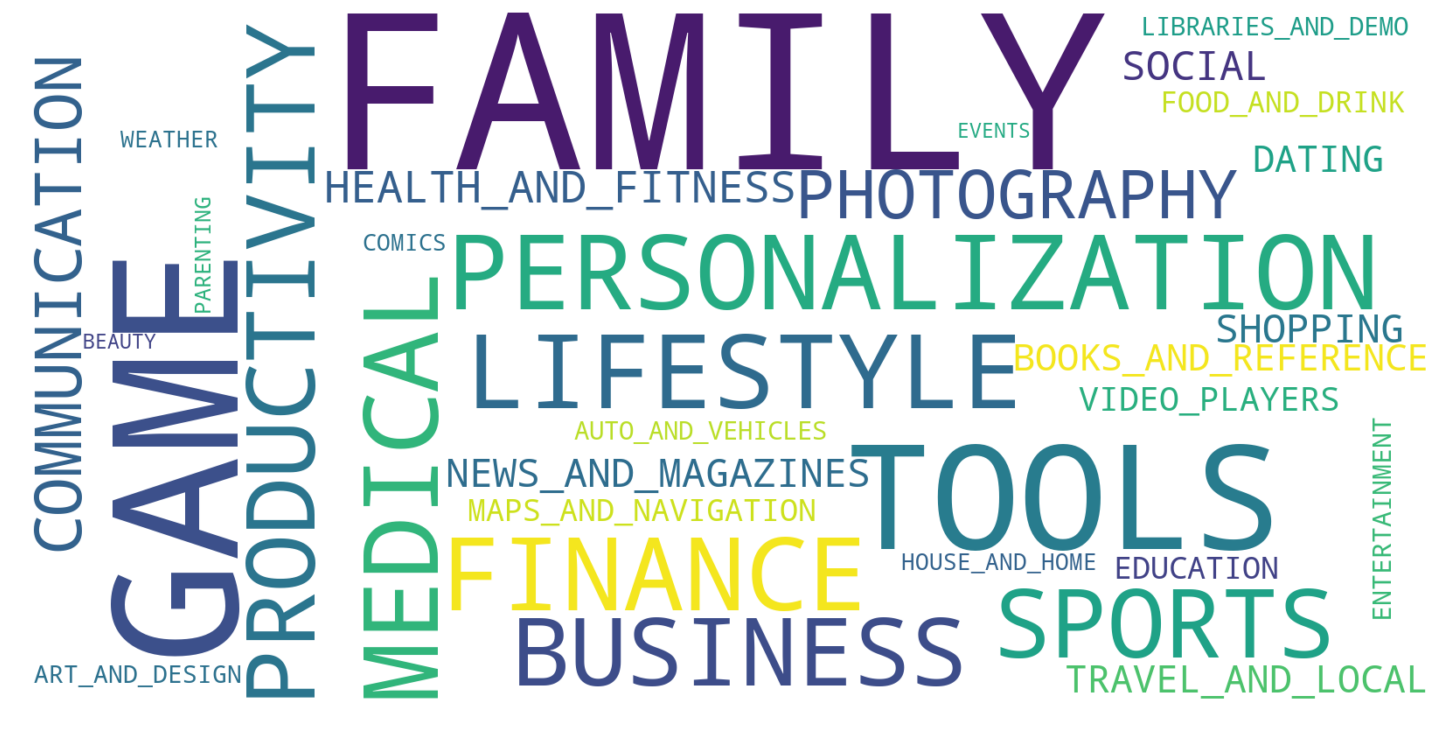

In [100]:
#Explore which categories have the biggest amount of apps
#WORDCLOUD
wc = WordCloud(max_font_size=250,collocations=False, 
                       max_words=33,width=1600, 
               height=800,background_color="white").generate(' '.join(apps['Category']))
plt.figure( figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

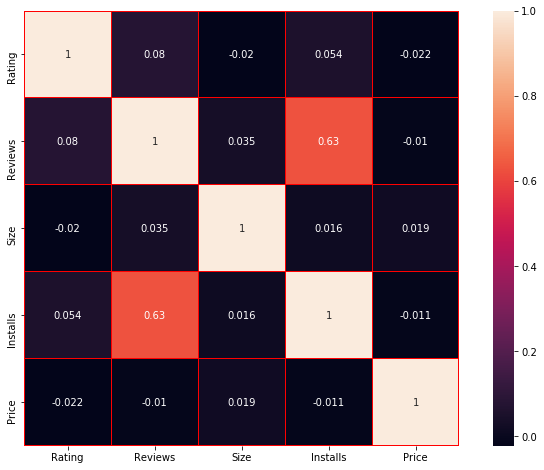

In [104]:
#HEATMAP
#For exploring correlations between features heatmap can be named among of the best visual tools.
#The individual values in the data matrix are represented by different colors that helps to quickly
#see what features have the most and the least dependencies.

plt.figure(figsize=(12,8))
sns.heatmap(apps.corr(),linewidth = 0.2, vmax=1.0, square=True, linecolor='red',annot=True)

Text(0.5, 1.0, 'CATEGORY DISTRIBUTION')

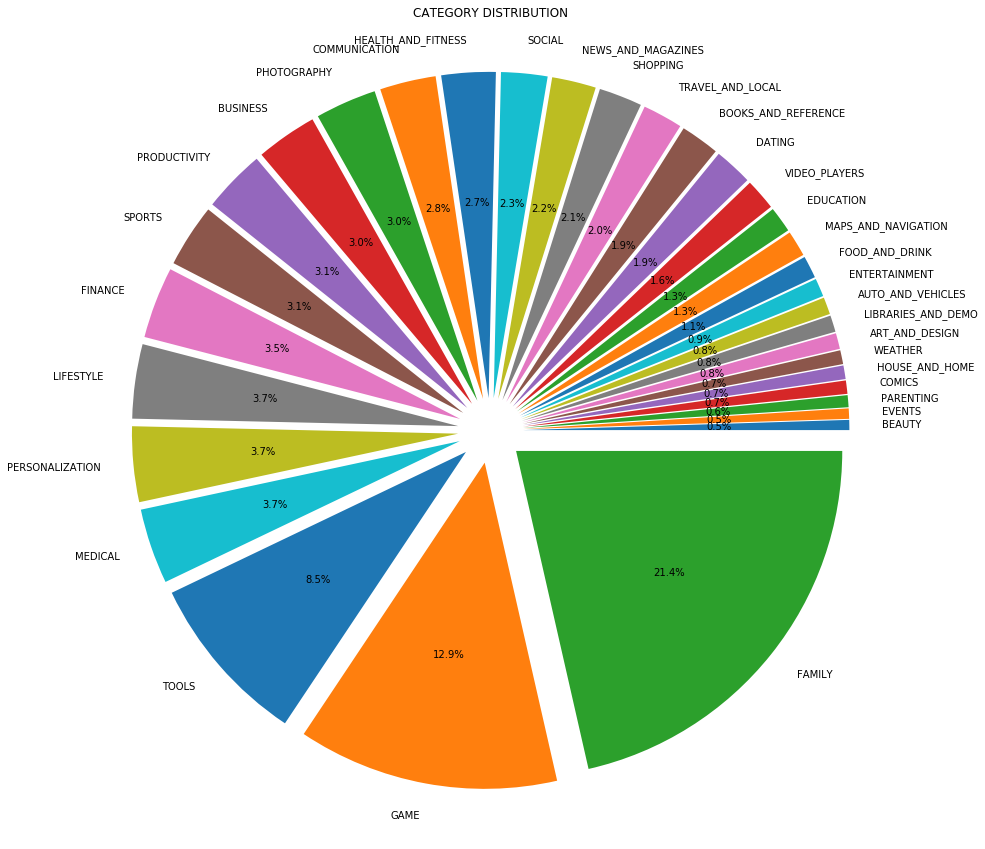

In [146]:
#The distribution of category of apps in GOOGLE PLAY STORE
#PIECHART
apps['Category_Coded']=le.fit_transform(apps['Category'])
group=apps[['Category','Category_Coded']].groupby(['Category'],as_index=False).count().sort_values(by=['Category_Coded'])
plt.figure(figsize=(20,15))
labels=group['Category']
e=[0.1 for i in range(33)]
plt.pie(group['Category_Coded'],autopct='%1.1f%%',labels=labels,explode=e)
plt.title('CATEGORY DISTRIBUTION')

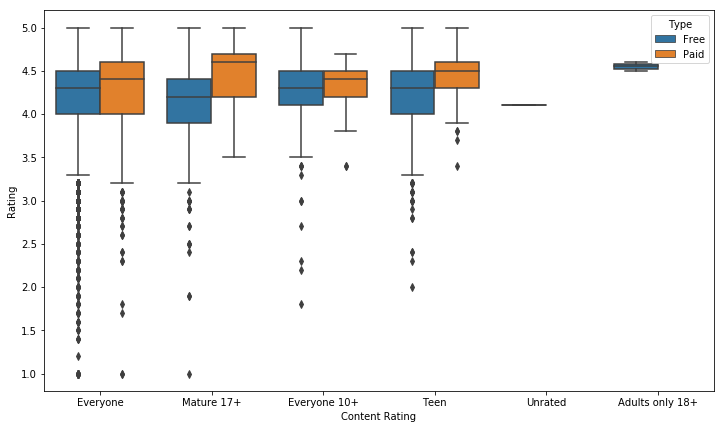

In [140]:
#BOXPLOT
plt.figure(figsize = (12,7))
sns.boxplot(x='Content Rating', y='Rating', hue='Type', data=apps)
plt.show()

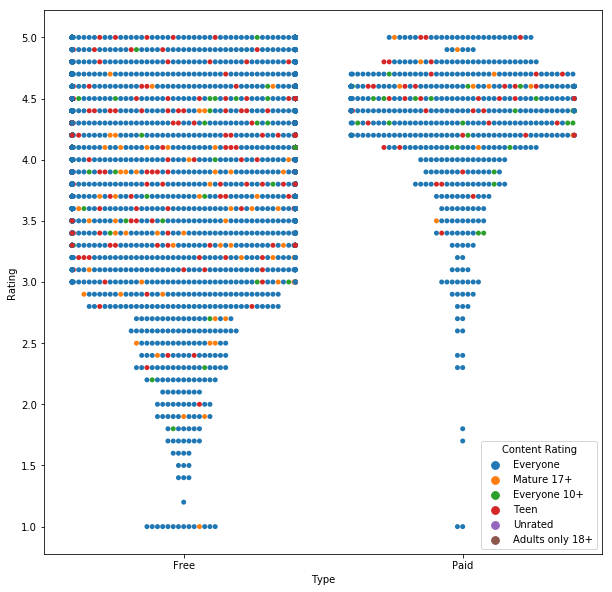

In [153]:
#SWARMPLOT
plt.figure(figsize=(10,10))
sns.swarmplot(x="Type", y="Rating", hue="Content Rating", data=apps)
plt.show()

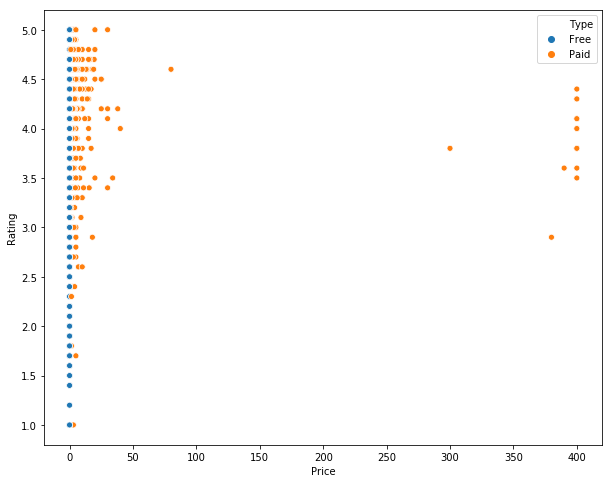

In [158]:
#SCATTERPLOT
#Pricing: How do price affects on app rating?
plt.figure(figsize=(10,8))
sns.scatterplot(x='Price',y='Rating',hue='Type',data=apps)

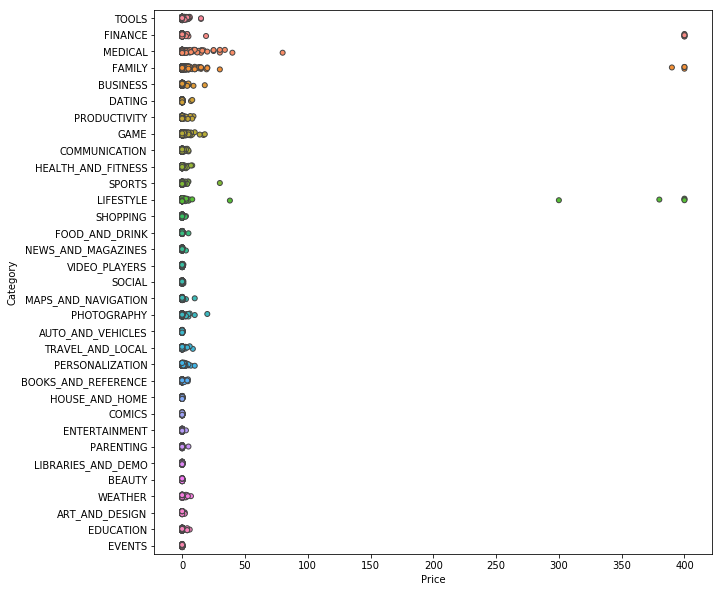

In [165]:
#STRIPPLOT
#hat about pricing across categories?
plt.figure(figsize=(10,10))
sns.stripplot(x='Price',y='Category',data=apps,linewidth=1)

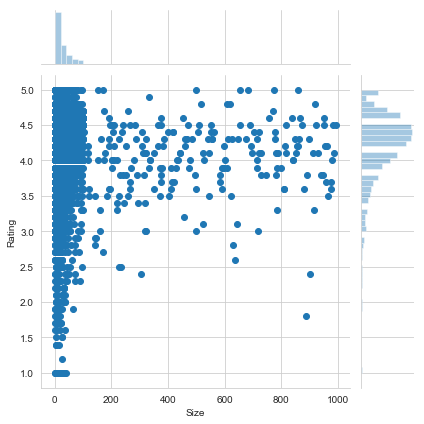

In [201]:
#JOINTPLOT
#Sizing strategy: How do size of the app impacts the rating?
sns.jointplot(apps['Size'],apps['Rating'])